In [2]:
import numpy as np
import pandas as pd
import sklearn
from sklearn import datasets 
import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model

# load the dataset
boston = datasets.load_boston()

/Users/charilaostsarouchas/anaconda/lib/python2.7/site-packages/pytz/__init__.py:29: UserWarning: Module argparse was already imported from /Users/charilaostsarouchas/anaconda/lib/python2.7/argparse.pyc, but /Users/charilaostsarouchas/anaconda/lib/python2.7/site-packages is being added to sys.path
  from pkg_resources import resource_stream


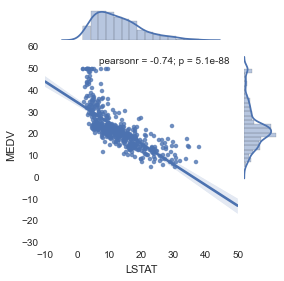

In [3]:
boston_df = pd.DataFrame(boston.data, columns = boston.feature_names)
boston_df["MEDV"] = boston.target
# we will perform simple linear regression => we keep one variable
df = boston_df[["MEDV", "LSTAT"]]
sns.jointplot(x="LSTAT", y="MEDV", data=boston_df, kind="reg", size=4);

### - - - Statsmodels

In [6]:
import statsmodels.api as sm
# !!!! Attention if we do not add any constant Statsmodels works but the result is different!!!
X = boston_df["LSTAT"]
model = sm.OLS(boston_df["MEDV"], X )
result = model.fit()
print result.summary()

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.448
Method:                 Least Squares   F-statistic:                     410.9
Date:                Tue, 01 Sep 2015   Prob (F-statistic):           2.71e-67
Time:                        12:42:05   Log-Likelihood:                -2182.4
No. Observations:                 506   AIC:                             4367.
Df Residuals:                     505   BIC:                             4371.
Df Model:                           1                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
LSTAT          1.1221      0.055     20.271      0.000         1.013     1.231
Omnibus:                        1.113   Durbin-Watso

In [8]:
import statsmodels.api as sm
#we have to add the constant 
X = sm.add_constant(boston_df["LSTAT"])
model = sm.OLS(boston_df["MEDV"], X )
result = model.fit()
print result.summary()

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Tue, 01 Sep 2015   Prob (F-statistic):           5.08e-88
Time:                        12:42:39   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.000        33.448    35.659
LSTAT         -0.9500      0.039    -24.528      0.0

In [9]:
# or use the formula a' la R interface:
import statsmodels.formula.api as smf
model = smf.ols(formula='MEDV ~ LSTAT', data=boston_df)
res = model.fit()
print res.summary()

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Tue, 01 Sep 2015   Prob (F-statistic):           5.08e-88
Time:                        12:42:40   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.000        33.448    35.659
LSTAT         -0.9500      0.039    -24.528      0.0

### - - - Scipy / Scikit

In [10]:
# Scikit-learn is build on top of Scipy
# Using scipy - this uses the test dataset
#Scikit-learn follows the machine learning tradition where the main supported task is chosing the "best" model 
#for prediction
# the emphasis is on model selection for out-of-sample prediction and therefore cross-validation on "test data".
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(boston_df["LSTAT"], boston_df["MEDV"])
print slope, intercept, r_value*r_value, p_value, std_err

-0.950049353758 34.5538408794 0.544146297586 5.08110339439e-88 0.0387334162126
